# Dataset Overview

1. Present the dataset shortly in your own words (please do not copy a description from another resource) and link to the url where you downloaded it from.

For this analysis, we will use the Wine Dataset from the UCI Machine Learning Repository. It is a dataset from wines made in 3 differents plant variety of Italy. 
This dataset contains information on the chemical properties of wines derived from three different cultivars. The dataset consists of 178 samples and 13 continuous features:

- Alcohol
- Malicacid
- Ash
- Alcalinity_of_ash
- Magnesium (Integer)
- Total_phenols
- Flavanoids
- Nonflavanoid_phenols
- Proanthocyanins
- Color_intensity
- Hue	
- 0D280_0D315_of_diluted_wines
- Proline (Integer)

Here is the link of the dataset:  https://archive.ics.uci.edu/dataset/109/wine

2. Explain very explicitely what problem you are trying to solve, and in particular what quantity you are trying to predict, as a function of which features.

The dataset is taken from chemical features of the 3 specific plant variety. Our purpose here is to be able to create cluster representing the 3 plants variety

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malicacid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv(url, header=None, names=column_names)

data.head()

# Data analysis

,Class,Alcohol,Malicacid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We are going to check if there are any outlier if the dataset with the Z-score method: There are not any outliers


,Feature,Outliers Count
Alcohol,Alcohol,0
Malicacid,Malicacid,0
Ash,Ash,0
Alcalinity of ash,Alcalinity of ash,0
Magnesium,Magnesium,1
Total phenols,Total phenols,0
Flavanoids,Flavanoids,0
Nonflavanoid phenols,Nonflavanoid phenols,0
Proanthocyanins,Proanthocyanins,0
Color intensity,Color intensity,0


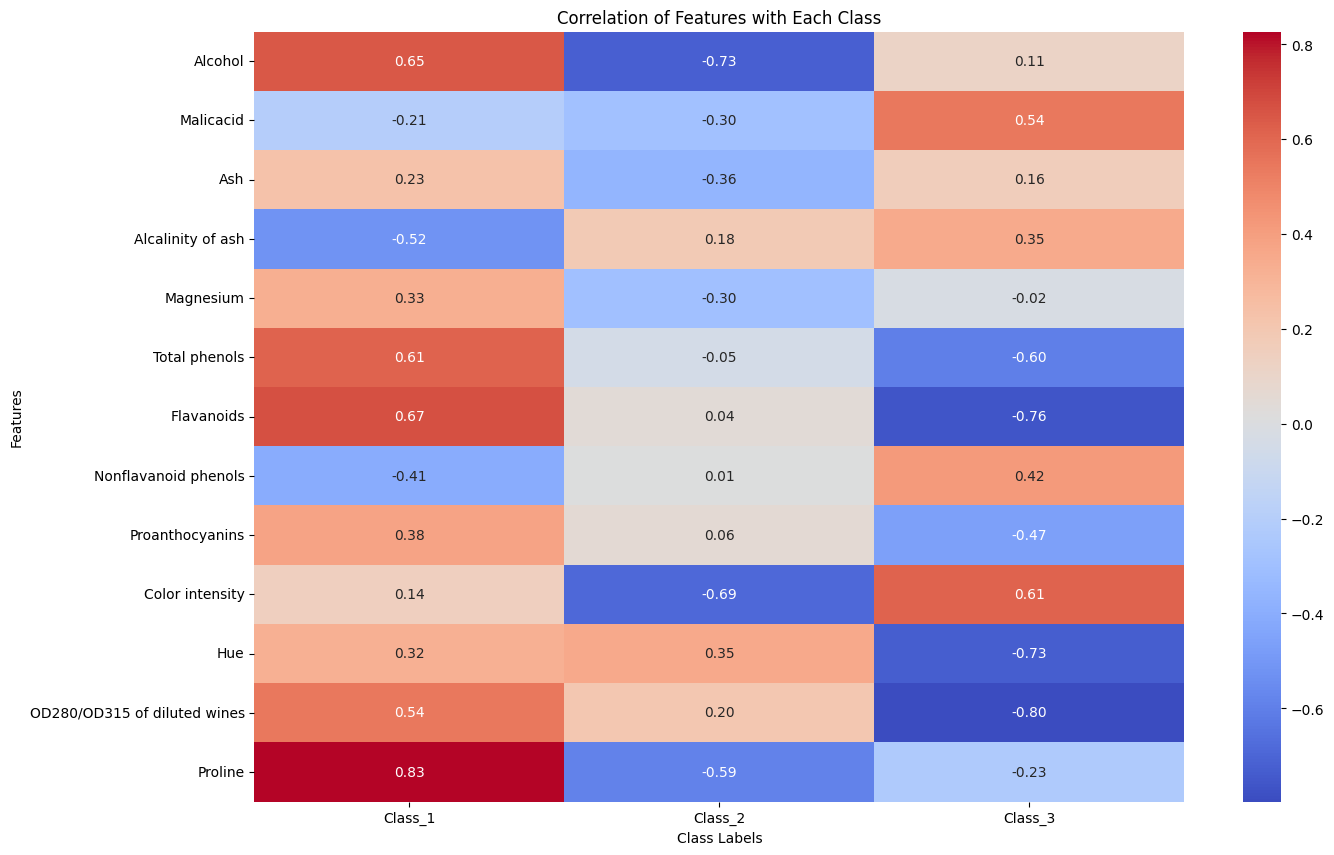

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display basic informations
display(data.describe())

# Checking outliers
print("We are going to check if there are any outlier if the dataset with the Z-score method: There are not any outliers")
z_scores = np.abs(stats.zscore(data.iloc[:, 1:]))  
outliers_count = np.sum(z_scores > 4, axis=0)
outliers_count_df = pd.DataFrame({'Feature': data.columns[1:], 'Outliers Count': outliers_count})
display(outliers_count_df)


# Correlation matrics
one_hot_classes = pd.get_dummies(data['Class'], prefix='Class')
data_one_hot = pd.concat([data, one_hot_classes], axis=1)

corr_matrix = data_one_hot.corr()
class_corr = corr_matrix.loc[data.columns[1:], one_hot_classes.columns]
plt.figure(figsize=(15, 10))
sns.heatmap(class_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Each Class')
plt.xlabel('Class Labels')
plt.ylabel('Features')
plt.show()

# Preprocessing 

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("Class", axis=1))

# Clustering

Silhouette Score: 0.2848589191898987


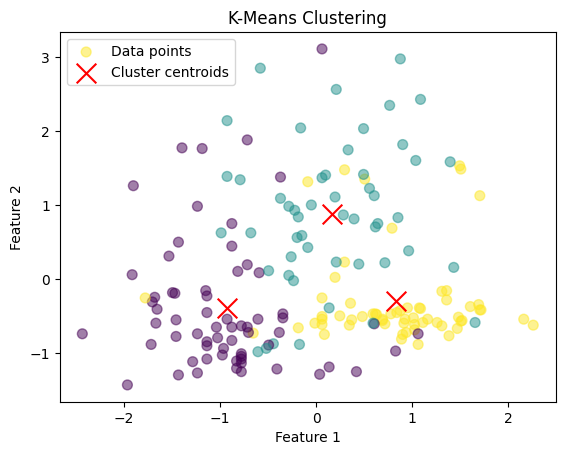

In [28]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Extraire les centres des clusters
centroids = kmeans.cluster_centers_

# Tracer les points de données et les centres de cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Cluster centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

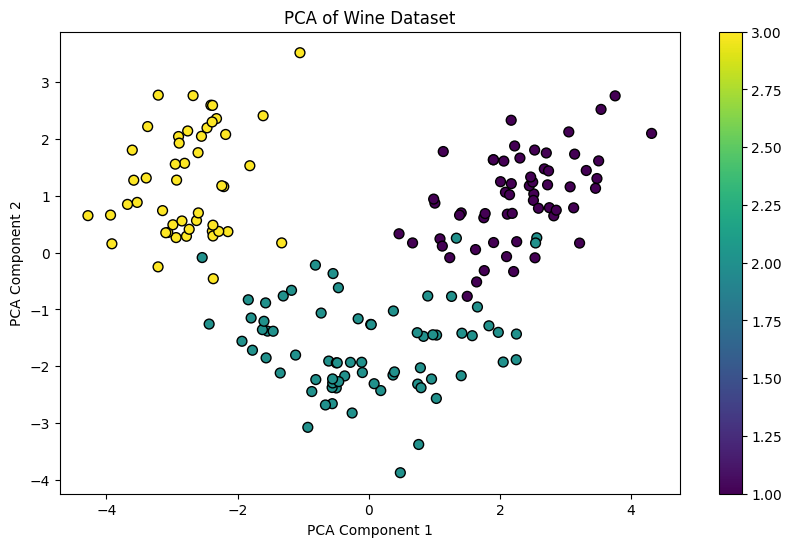

In [29]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["Class"], cmap="viridis", edgecolor="k", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Wine Dataset")
plt.colorbar()
plt.show()

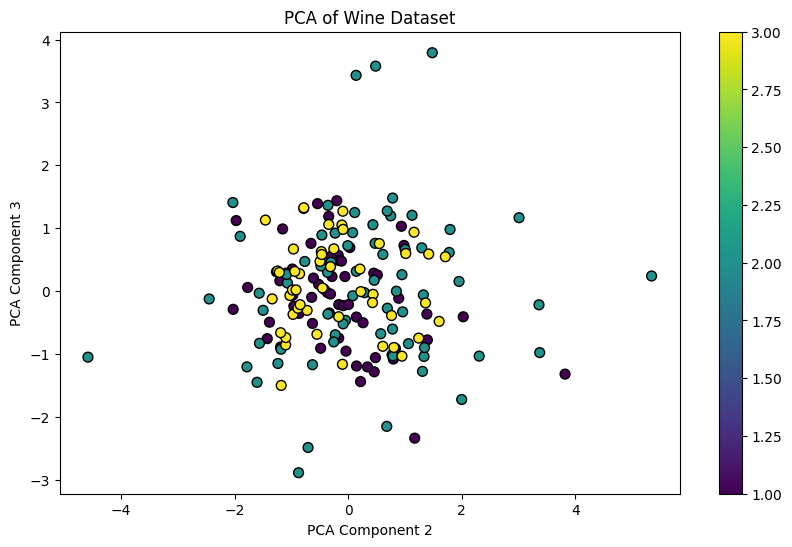

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 2], X_pca[:, 3], c=data["Class"], cmap="viridis", edgecolor="k", s=50)
plt.xlabel("PCA Component 2")
plt.ylabel("PCA Component 3")
plt.title("PCA of Wine Dataset")
plt.colorbar()
plt.show()

# Result

Discuss the results obtained. Have we solved a problem with this processing ?


We can see that the cluster looks good but it depends a lot according to wich features we are displaying

Beside the silouette score is of 0,28 which can be trained